In [2]:
# Create a series that counts the number of null values in each of the columns in the mvc dataframe. Assign the result to null_counts.

import pandas as pd
mvc = pd.read_csv("nypd_mvc_2018.csv")
null_counts = mvc.isnull().sum()

In [3]:
# We created a dataframe killed, containing the five columns that relate to people killed in collisions.

# Select the first three columns from killed and sum each row. Assign the result to killed_manual_sum.
# Create a boolean mask that checks whether each value in killed_manual_sum is not equal to the values in the total_killed column. Assign the boolean mask to killed_mask.
# Use killed_mask to filter the rows in killed. Assign the result to killed_non_eq.

killed_cols=[col for col in mvc.columns if 'killed' in col]
killed=mvc[killed_cols]
killed_manual_sum=killed.iloc[:,:3].sum(axis=1)
killed_mask=killed_manual_sum!=killed['total_killed']
killed_non_eq=killed[killed_mask]
killed.head()

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,0,0.0
3,0,0,0,0.0
4,0,0,0,0.0


In [16]:
# We included the code to clean the killed columns. In addition, we've created an injured dataframe with just the injured columns and injured_manual_sum, a series manually summing the three individual injured columns.

# Use Series.mask() to replace any null values from the total_injured column with their equivalents from the injured_manual_sum series.
# Use Series.mask() to replace any numbers from total_injured that aren't equal to their equivalents in injured_manual_sum with np.nan.

import numpy as np

killed['total_killed']=killed['total_killed'].mask(killed['total_killed'].isnull(),killed_manual_sum)
killed['total_killed']=killed['total_killed'].mask(killed['total_killed']!=killed_manual_sum,np.nan)

injured=mvc[[col for col in mvc.columns if 'injured' in col]]
injured_manual_sum=injured.iloc[:,:3].sum(axis=1)
injured['total_injured']=injured['total_injured'].mask(injured['total_injured'].isnull(),injured_manual_sum)
injured['total_injured']=injured['total_injured'].mask(injured['total_injured']!=injured_manual_sum,np.nan)
injured.head()

<ipython-input-16-3f0b374a8864>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  killed['total_killed']=killed['total_killed'].mask(killed['total_killed'].isnull(),killed_manual_sum)
<ipython-input-16-3f0b374a8864>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  killed['total_killed']=killed['total_killed'].mask(killed['total_killed']!=killed_manual_sum,np.nan)
<ipython-input-16-3f0b374a8864>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,1,1.0
3,0,0,0,0.0
4,0,0,0,0.0


In [5]:
# Assign the total_injured column from the injured dataframe to the same column in the mvc dataframe.
# Assign the total_killed column from the killed dataframe to the same column in the mvc dataframe.

injured['total_injured']=mvc['total_injured']
killed['total_killed']=mvc['total_killed']
mvc.head()

<ipython-input-5-bdd1d6104ffe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injured['total_injured']=mvc['total_injured']
<ipython-input-5-bdd1d6104ffe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  killed['total_killed']=mvc['total_killed']


,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,...,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,...,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN


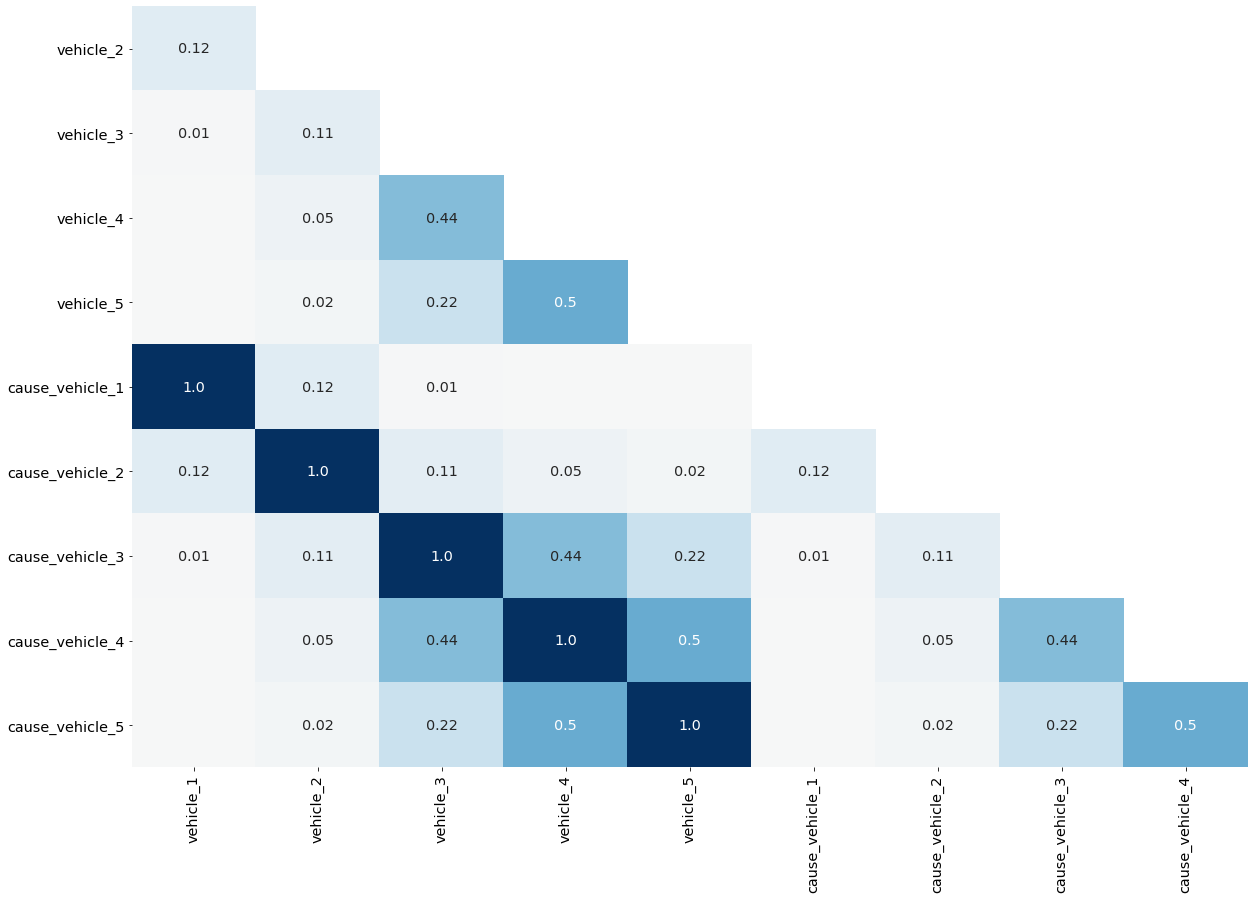

In [17]:
# We created a function, plot_null_correlations(), which will plot correlations between null values in a dataframe.

# Use list comprehension to produce a list of column names containing the substring 'vehicle'.
# Use the list of column names to select only those columns from the mvc dataframe. Pass the result to the plot_null_correlations() function
import matplotlib.pyplot as plt
import seaborn as sns

def plot_null_correlations(df):
    
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    missing_corr = missing_corr.iloc[1:, :-1]
    mask=np.triu(np.ones_like(missing_corr), k=1)
    
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False, cmap='RdBu', mask=mask, annot=True)
    
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()
    

vehicle=mvc[[col for col in mvc.columns if 'vehicle' in col]]

plot_null_correlations(vehicle)

In [7]:
# We provided the start of the loop you are going to build, including code that generates each column name as strings: v_col and c_col

col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

# Uncomment the commented lines (you might want to use this keyboard shortcut).

# Add code to the body of the loop that will:
# Count the number of rows where the v_col column is null and the c_col column is not null. Assign the result to v_null.
# Count the number of rows where the c_col column is null and the v_col column is not null. Assign the result to c_null.
# Append an item to the vc_null_data list. The item should be a list containing, in order: v, v_null, c_null.

vc_null_data = []

for v in range(1,6):
    v_col='vehicle_{}'.format(v)
    c_col='cause_vehicle_{}'.format(v)
    v_null=(mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null=(mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
    vc_null_data.append([v,v_null,c_null])

vc_null_df=pd.DataFrame(vc_null_data,columns=col_labels)

In [8]:
# We provided a list comprehension that identifies columns starting with the substring vehicle.

# Create a dataframe containing only the columns from mvc, identified by the list comprehension v_cols.
# Use DataFrame.stack() to stack the values from the dataframe into a single series object.
# Use Series.value_counts() to count the unique values from the stacked series. Assign the first 10 values to top10_vehicles.

v_cols = [c for c in mvc.columns if c.startswith("vehicle")]
top10_vehicles=mvc[v_cols].stack().value_counts().head(10)
top10_vehicles

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64

In [9]:
# In addition to the helper function, we provided the start of the loop you are going to build, including code that generates each column name as a string.

# Uncomment the commented lines (you might want to use this keyboard shortcut).
# Add code to the body of the loop that:
# Creates a boolean mask for values where the vehicle column is null and the cause column is non-null.
# Creates a boolean mask for values where the cause column is null and the vehicle column is non-null.
# Uses the first boolean mask to fill matching values from the vehicle column with the string Unspecified.
# Uses the second boolean mask to fill matching values from the cause column with the string Unspecified.
# Outside the loop, use the summarize_missing() function to check that you have removed all matching values. Assign the result to summary_after.

def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before=summarize_missing()

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
        
    v_missing_mask=mvc[v_col].isnull() & mvc[c_col].notnull()
    c_missing_mask=mvc[c_col].isnull() & mvc[v_col].notnull()
        
    mvc[v_col]=mvc[v_col].mask(v_missing_mask,'Unspecified')
    mvc[c_col]=mvc[c_col].mask(c_missing_mask,'Unspecified')
        
summary_after=summarize_missing()

In [10]:
# We read the supplemental data into a dataframe called sup_data. Additionally, we provided a list of the location columns, location_cols, and calculated the number of null values in these columns.

# Loop over the column names in location_cols. In each iteration of the loop, use Series.mask() to replace values in the column in the mvc dataframe:
# The mask should represent whether the values in column in the mvc has a null value or not.
# Where the mask is true, the value should be replaced with the equivalent value in sup_data.
# Calculate the number of null values across the location_cols columns in mvc after you adding the supplemental data. Assign the result to null_after.

sup_data = pd.read_csv('supplemental_data.csv')

location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before=mvc[location_cols].isnull().sum()

for l in location_cols:
    mvc[l]=mvc[l].mask(mvc[l].isnull(),sup_data[l])
    
null_after=mvc[location_cols].isnull().sum()    

In [11]:
null_before

location       3885
on_street     13961
off_street    44093
borough       20646
dtype: int64

In [12]:
null_after

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64

In [13]:
# If you'd like to continue working with this data, you can:

# Drop the rows that had suspect values for injured and killed totals.
# Clean the values in the vehicle_1 through vehicle_5 columns by analyzing the different values and merging duplicates and near-duplicates.
# Analyze whether collisions are more likely in certain locations, at certain times, or for certain vehicle types.